In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('makaan_Cr_pro.csv')

In [3]:
df

,Availability,Residence Type,Price(in Crores),Area(sq.ft),Price per sq.ft (₹),Construction Status,Locality,City
0,3 BHK,Apartment,1.180,2037,5793,Under Construction,Krishnarajapura,Bangalore
1,2 BHK,Apartment,0.693,1234,5614,Under Construction,Horamavu,Bangalore
2,2 BHK,Apartment,0.576,1240,4642,Under Construction,Electronic City Phase 1,Bangalore
3,2 BHK,Apartment,0.433,1110,3900,Ready to move,Sarjapur,Bangalore
4,4 BHK,Apartment,11.666,5180,22522,Ready to move,Frazer Town,Bangalore
...,...,...,...,...,...,...,...,...
1055,2 BHK,Apartment,0.750,893,8398,Ready to move,Calangute,Goa
1056,2 BHK,Villa,2.000,1237,16168,Ready to move,Calangute,Goa
1057,1 BHK,Apartment,0.500,731,6839,Ready to move,Sangolda,Goa
1058,2 BHK,Apartment,0.390,839,4648,Ready to move,Salcete,Goa


In [4]:
bng=df[df['City']=='Bangalore']
dlh=df[df['City']=='Delhi']
mum=df[df['City']=='Mumbai']
goa=df[df['City']=='Goa']

## Univariate Analysis

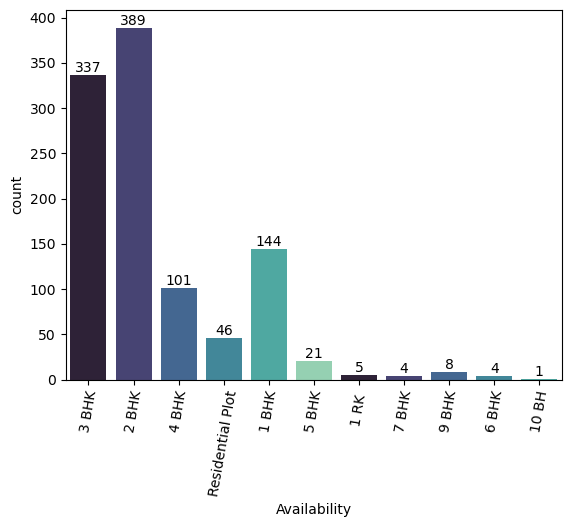

In [5]:
colors=sns.color_palette('mako')
bhks=sns.countplot(x='Availability',data=df,palette=colors)
plt.xticks(rotation=80)
plt.show
for bars in bhks.containers:
    bhks.bar_label(bars)

In [6]:
ay=cross4.plot(kind='bar')#,stacked=True)
for i in ay.containers:
    ay.bar_label(i)

NameError: name 'cross4' is not defined

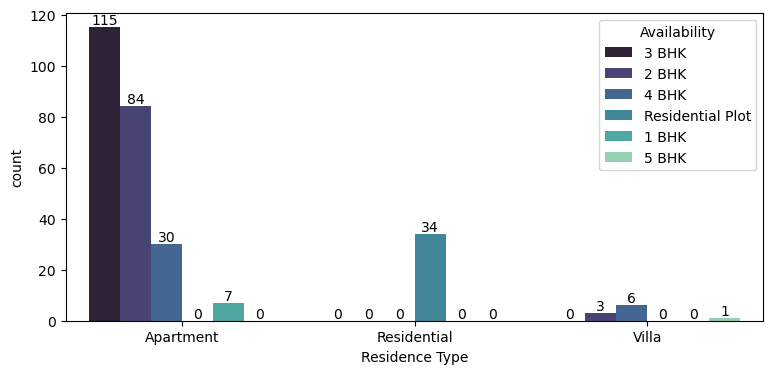

In [7]:
color=sns.color_palette('mako')
plt.figure(figsize=(9,4))
ay=sns.countplot(x='Residence Type',hue='Availability',data=bng,palette=color)
for i in ay.containers:
    ay.bar_label(i)

## Outlier Detection

In [8]:
df['Price(in Crores)'].describe()

count    1060.000000
mean        1.581889
std         2.002675
min         0.050000
25%         0.512000
50%         0.937000
75%         1.750000
max        25.000000
Name: Price(in Crores), dtype: float64

In [9]:
Q1=df['Price(in Crores)'].quantile(0.25)
Q3=df['Price(in Crores)'].quantile(0.75)

In [10]:
IQR=Q3-Q1
IQR

1.238

In [11]:
lower=round(Q1-(1.5*IQR),3)
lower

-1.345

In [12]:
upper=round(Q3+(1.5*IQR),3)
upper

3.607

In [13]:
out=df[(df['Price(in Crores)']<lower)|(df['Price(in Crores)']>upper)]

In [14]:
outlier=df[(df['Price(in Crores)']>lower)&(df['Price(in Crores)']<upper)]

In [15]:
outlier

,Availability,Residence Type,Price(in Crores),Area(sq.ft),Price per sq.ft (₹),Construction Status,Locality,City
0,3 BHK,Apartment,1.180,2037,5793,Under Construction,Krishnarajapura,Bangalore
1,2 BHK,Apartment,0.693,1234,5614,Under Construction,Horamavu,Bangalore
2,2 BHK,Apartment,0.576,1240,4642,Under Construction,Electronic City Phase 1,Bangalore
3,2 BHK,Apartment,0.433,1110,3900,Ready to move,Sarjapur,Bangalore
5,Residential Plot,Residential,0.323,2000,1615,New,Karudabande Hosahalli,Bangalore
...,...,...,...,...,...,...,...,...
1055,2 BHK,Apartment,0.750,893,8398,Ready to move,Calangute,Goa
1056,2 BHK,Villa,2.000,1237,16168,Ready to move,Calangute,Goa
1057,1 BHK,Apartment,0.500,731,6839,Ready to move,Sangolda,Goa
1058,2 BHK,Apartment,0.390,839,4648,Ready to move,Salcete,Goa


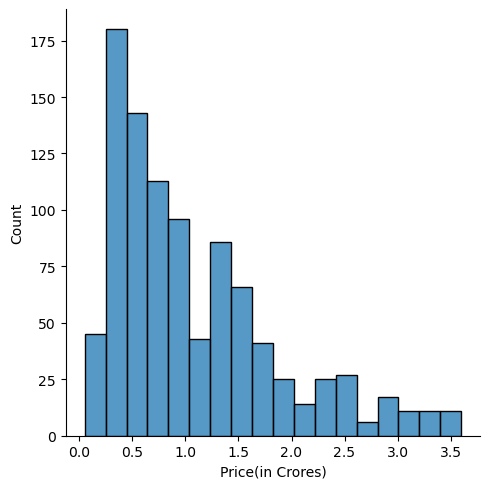

In [16]:
sns.displot(outlier['Price(in Crores)'])

## Plots for Outliers

<Axes: >

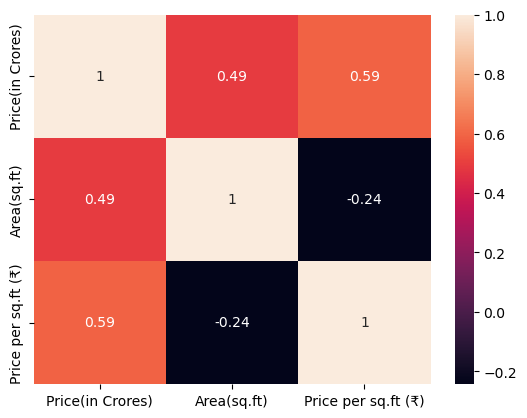

In [17]:
sns.heatmap(outlier.corr(),annot=True)

<Axes: xlabel='Price(in Crores)', ylabel='Price per sq.ft (₹)'>

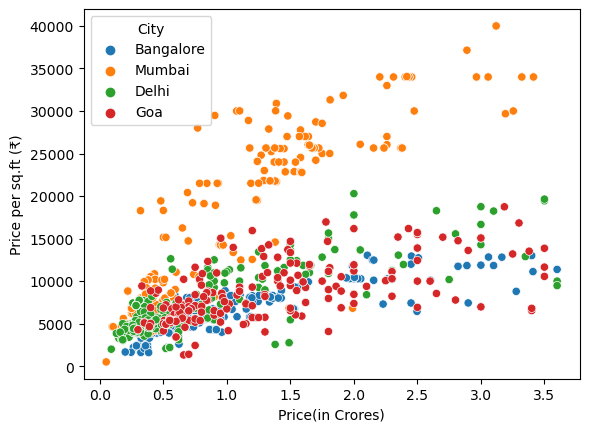

In [18]:
sns.scatterplot(x='Price(in Crores)',y='Price per sq.ft (₹)',data=outlier,hue='City')

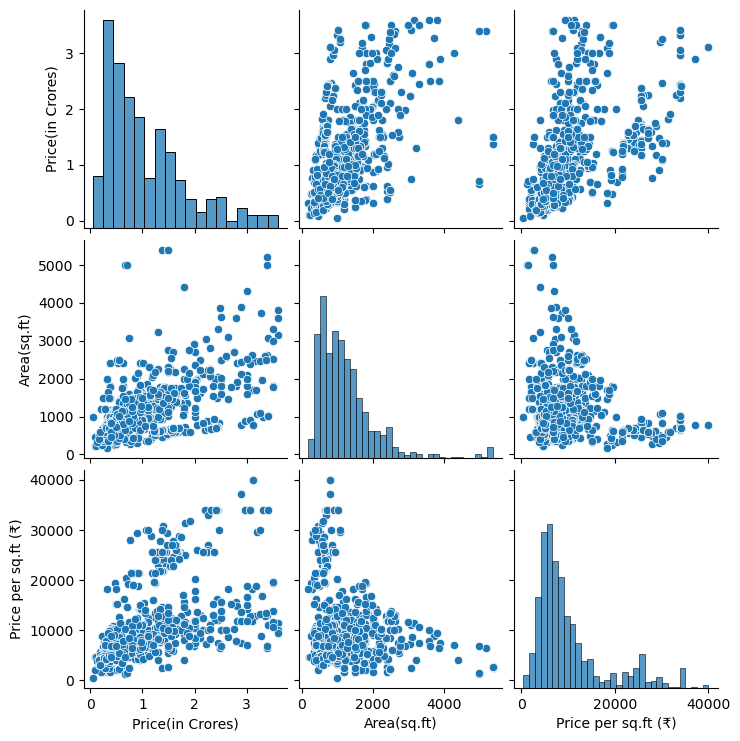

In [19]:
sns.pairplot(data=outlier)

## Bivariate Analysis

In [20]:
ax=df.groupby('City')['Price(in Crores)'].mean()

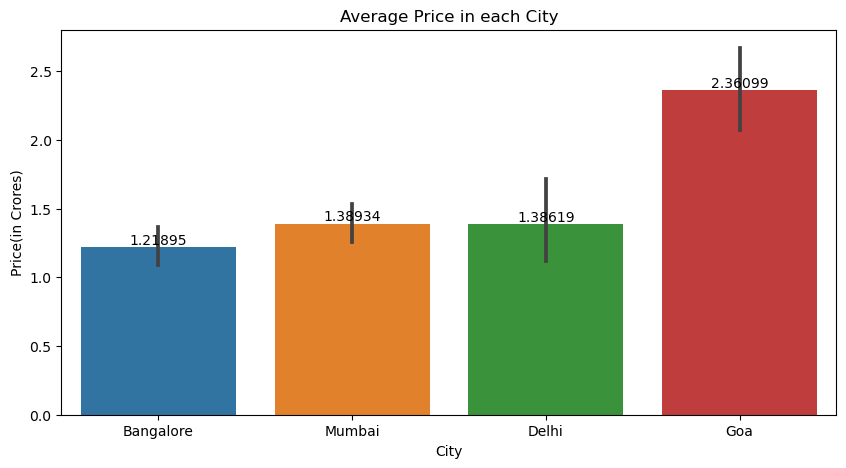

In [21]:
plt.figure(figsize=(10,5))
plt.title('Average Price in each City')
ax=sns.barplot(x='City',y='Price(in Crores)',data=df)
for i in ax.containers:
    ax.bar_label(i)

<Axes: xlabel='Locality', ylabel='Price'>

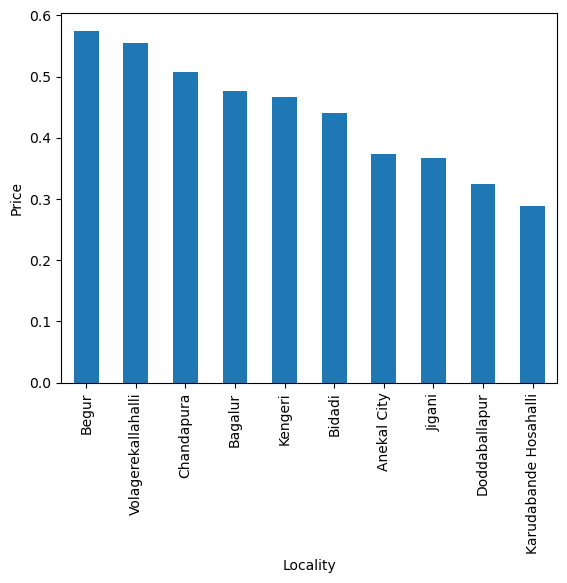

In [22]:
plt.ylabel('Price')
bng.groupby('Locality')['Price(in Crores)'].mean().nsmallest(10).sort_values(ascending=False).plot(kind='bar')

<Axes: xlabel='City', ylabel='Price(in Crores)'>

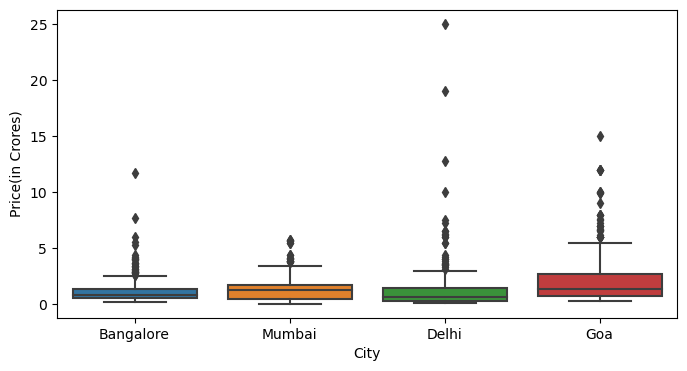

In [23]:
colr=sns.color_palette('dark')
plt.figure(figsize=(8,4))
sns.boxplot(data=df,x='City',y='Price(in Crores)')#,palette=color)

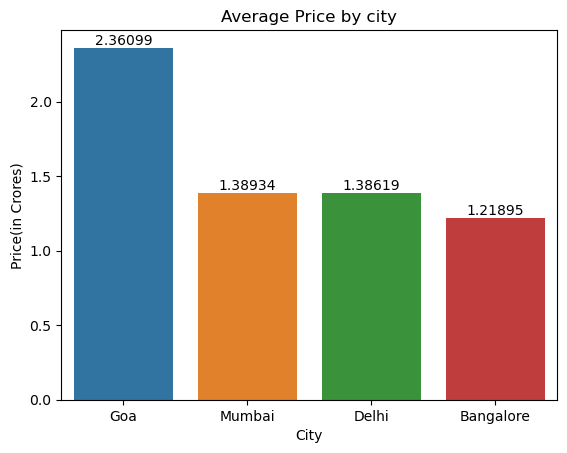

In [24]:
plt.title('Average Price by city')
city_avg=df.groupby(['City'],as_index=False)['Price(in Crores)'].mean().sort_values('Price(in Crores)',ascending=False)
az=sns.barplot(data=city_avg,x='City',y='Price(in Crores)')
for i in az.containers:
    az.bar_label(i)

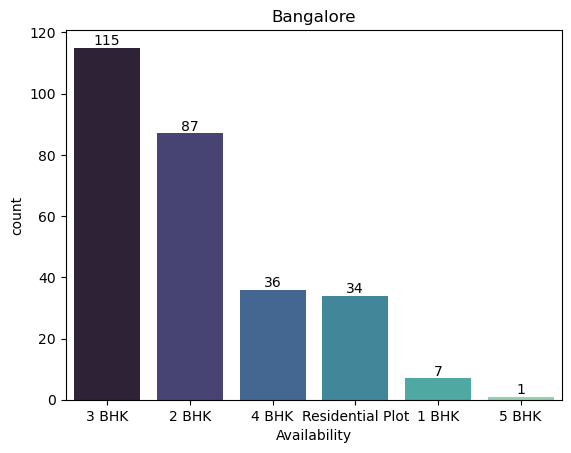

In [25]:
colors=sns.color_palette('mako')
#plt.xticks(rotation=30)
plt.title('Bangalore')
au=sns.countplot(x='Availability',data=bng,palette=colors)
for i in au.containers:
    au.bar_label(i)

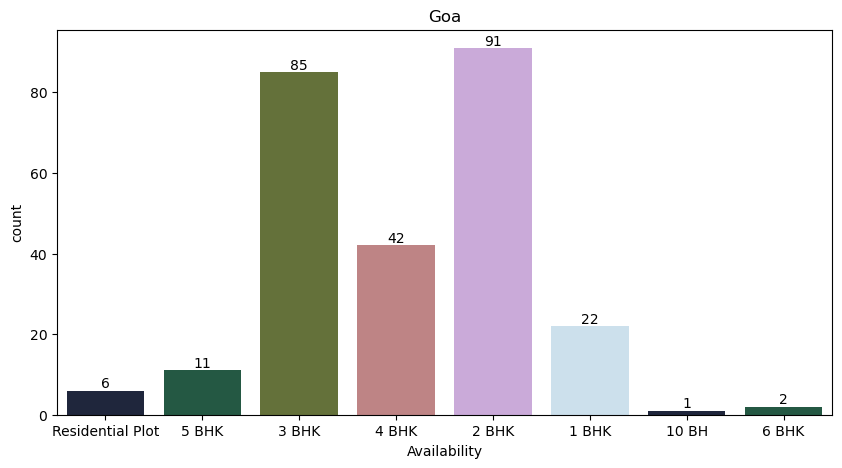

In [26]:
plt.figure(figsize=(10,5))
plt.title('Goa')
#plt.xticks(rotation=30)
colors=sns.color_palette('cubehelix')
au=sns.countplot(x='Availability',data=goa,palette=colors)
for i in au.containers:
    au.bar_label(i)

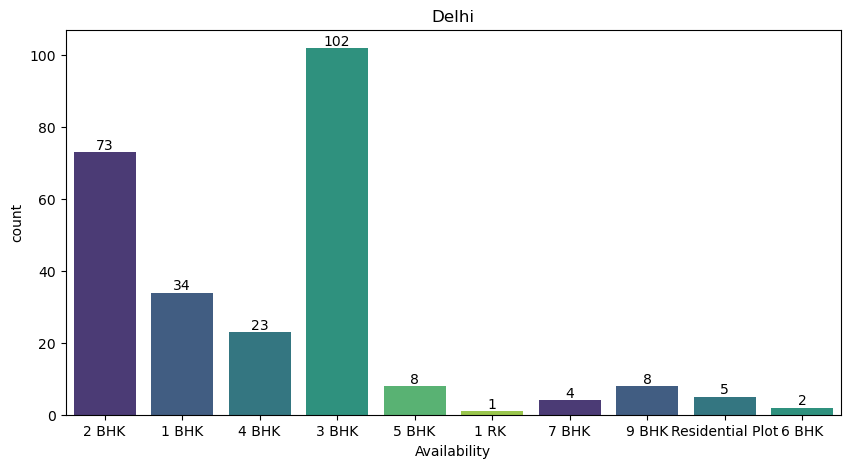

In [27]:
plt.figure(figsize=(10,5))
plt.title('Delhi')
#plt.xticks(rotation=30)
colors=sns.color_palette('viridis')
au=sns.countplot(x='Availability',data=dlh,palette=colors)
for i in au.containers:
    au.bar_label(i)

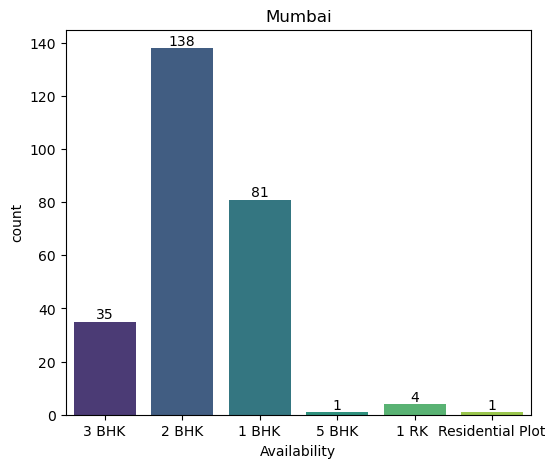

In [28]:
plt.figure(figsize=(6,5))
plt.title('Mumbai')
#plt.xticks(rotation=30)
colors=sns.color_palette('viridis')
au=sns.countplot(x='Availability',data=mum,palette=colors)
for i in au.containers:
    au.bar_label(i)

## Comparing price range between cities

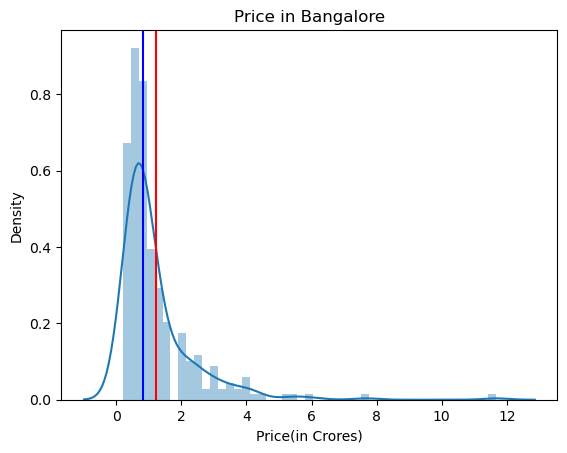

In [29]:
plt.title('Price in Bangalore')
sns.distplot(bng['Price(in Crores)'])
plt.axvline(bng['Price(in Crores)'].mean(),color='red')
plt.axvline(bng['Price(in Crores)'].quantile(0.5),color='blue')

plt.show()

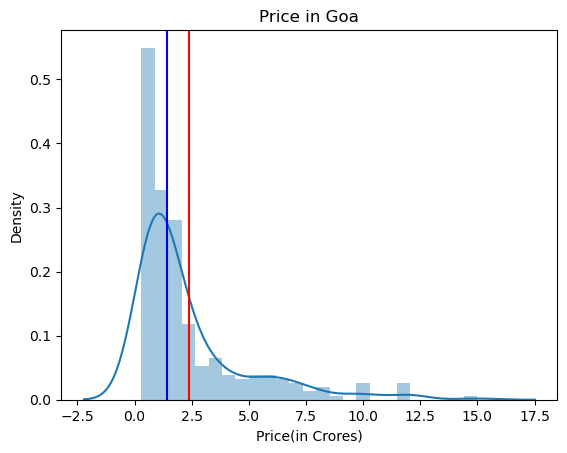

In [30]:
plt.title('Price in Goa')
sns.distplot(goa['Price(in Crores)'])
plt.axvline(goa['Price(in Crores)'].mean(),color='red')
plt.axvline(goa['Price(in Crores)'].quantile(0.5),color='blue')
plt.show()

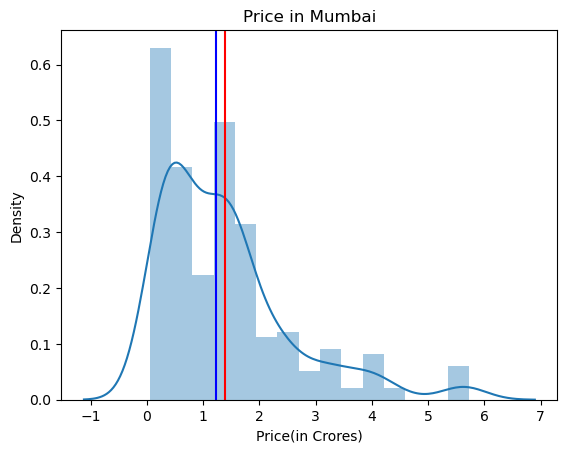

In [31]:
plt.title('Price in Mumbai')
sns.distplot(mum['Price(in Crores)'])
plt.axvline(mum['Price(in Crores)'].mean(),color='red')
plt.axvline(mum['Price(in Crores)'].quantile(0.5),color='blue')
plt.show()

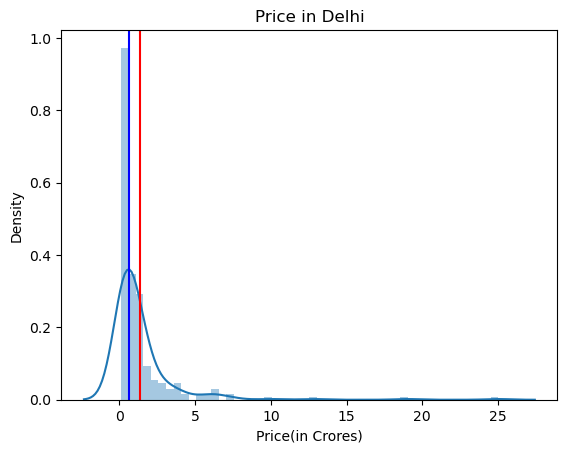

In [32]:
plt.title('Price in Delhi')
sns.distplot(dlh['Price(in Crores)'])
plt.axvline(dlh['Price(in Crores)'].mean(),color='red')
plt.axvline(dlh['Price(in Crores)'].quantile(0.5),color='blue')
plt.show()

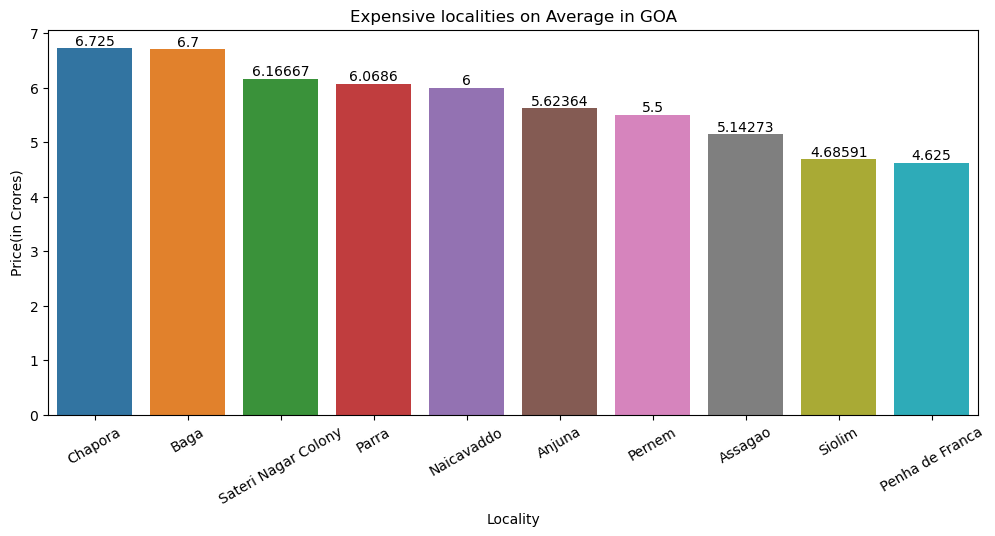

In [33]:
plt.figure(figsize=(12,5))
plt.xticks(rotation=30)
plt.title('Expensive localities on Average in GOA')
goa_avg=goa.groupby('Locality',as_index=False)['Price(in Crores)'].mean().sort_values(by='Price(in Crores)',ascending=False).head(10)
ax=sns.barplot(x='Locality',y='Price(in Crores)',data=goa_avg)
for i in ax.containers:
    ax.bar_label(i)

In [34]:
goa_avg

,Locality,Price(in Crores)
10,Chapora,6.725000
4,Baga,6.700000
34,Sateri Nagar Colony,6.166667
24,Parra,6.068600
21,Naicavaddo,6.000000
1,Anjuna,5.623636
26,Pernem,5.500000
3,Assagao,5.142727
35,Siolim,4.685909
25,Penha de Franca,4.625000


## Pivot Table

In [35]:
bng.pivot_table(columns='Construction Status',values='Price(in Crores)',aggfunc='mean')

Construction Status,New,Ready to move,Under Construction
Price(in Crores),0.577529,1.613492,1.197757


In [36]:
dlh.pivot_table(columns='Construction Status',values='Price(in Crores)',aggfunc='mean')

Construction Status,Ready to move,Resale,Under Construction
Price(in Crores),1.420693,1.504,0.567273


In [37]:
mum.pivot_table(columns='Construction Status',values='Price(in Crores)',aggfunc='mean')

Construction Status,Ready to move,Resale,Under Construction
Price(in Crores),0.670639,0.05,1.511368


In [38]:
df.pivot_table(columns='Construction Status',values='Price(in Crores)',aggfunc='mean')

Construction Status,New,Ready to move,Resale,Under Construction
Price(in Crores),0.659056,1.592774,2.468,1.619367


In [39]:
dlh.pivot_table(columns='Residence Type',values='Price(in Crores)',aggfunc='mean')


Residence Type,Apartment,Floor,Independent House,Residential
Price(in Crores),0.942765,1.37258,2.383231,1.504


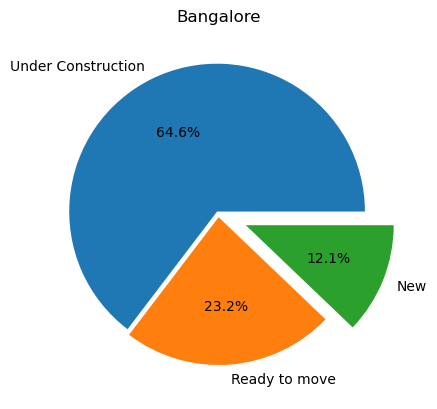

In [40]:
plt.title('Bangalore')
plt.pie(bng['Construction Status'].value_counts(),explode=(0.02,0.02,0.2),labels=bng['Construction Status'].unique(),autopct="%.1f%%")
plt.show()

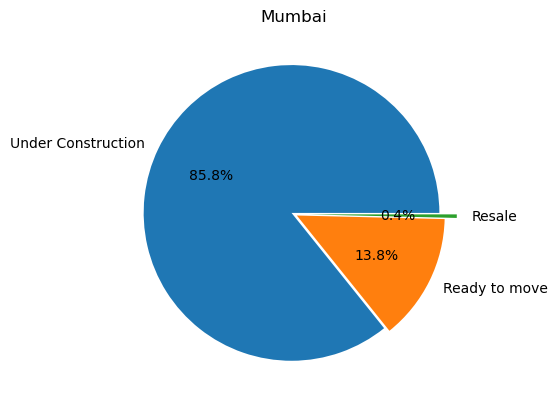

In [41]:
plt.title('Mumbai')
plt.pie(mum['Construction Status'].value_counts(),explode=(0.02,0.02,0.1),labels=mum['Construction Status'].unique(),autopct="%.1f%%")
plt.show()

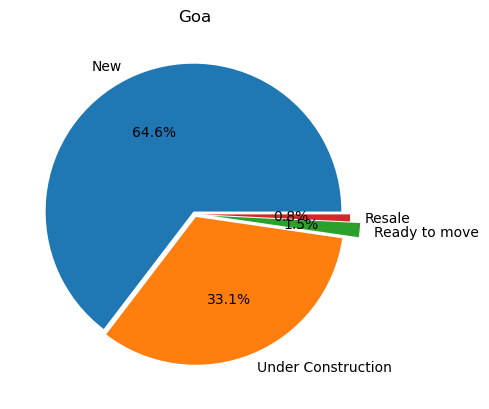

In [42]:
plt.title('Goa')
plt.pie(goa['Construction Status'].value_counts(),explode=(0.02,0.02,0.12,0.05),labels=goa['Construction Status'].unique(),autopct="%.1f%%")
plt.show()

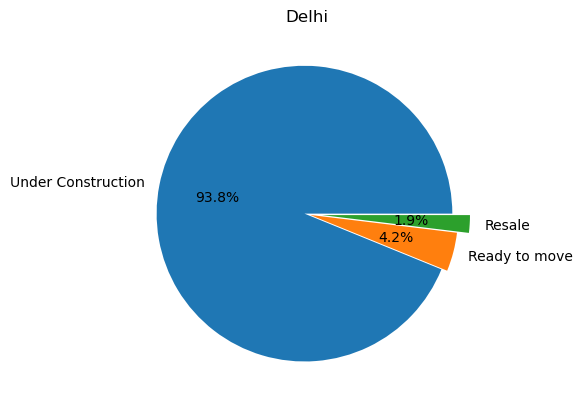

In [43]:
plt.title('Delhi')
plt.pie(dlh['Construction Status'].value_counts(),explode=(0.02,0.02,0.1),labels=mum['Construction Status'].unique(),autopct="%.1f%%")
plt.show()

In [44]:
bng['Construction Status'].value_counts()

Under Construction    181
Ready to move          65
New                    34
Name: Construction Status, dtype: int64

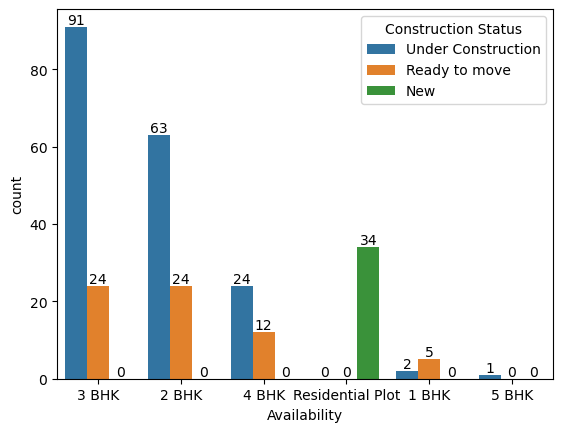

In [45]:
ax=sns.countplot(x='Availability',hue='Construction Status',data=bng)
for i in ax.containers:
    ax.bar_label(i)

## Crosstab

In [46]:
cross=pd.crosstab(df['Availability'],df['City'])
cross

City,Bangalore,Delhi,Goa,Mumbai
Availability,,,,
1 BHK,7,34,22,81
1 RK,0,1,0,4
10 BH,0,0,1,0
2 BHK,87,73,91,138
3 BHK,115,102,85,35
4 BHK,36,23,42,0
5 BHK,1,8,11,1
6 BHK,0,2,2,0
7 BHK,0,4,0,0


In [47]:
cross1=pd.crosstab(df['City'],df['Residence Type'])
cross1

Residence Type,Apartment,Floor,Independent House,Penthouse,Residential,Villa
City,,,,,,
Bangalore,236,0,0,0,34,10
Delhi,85,131,39,0,5,0
Goa,153,6,15,1,6,79
Mumbai,255,0,0,0,1,4


In [48]:
cross3=pd.crosstab(mum['City'],mum['Residence Type'])
cross3

Residence Type,Apartment,Residential,Villa
City,,,
Mumbai,255,1,4


In [49]:
cross4=pd.crosstab(df['City'],df['Construction Status'])
cross4

Construction Status,New,Ready to move,Resale,Under Construction
City,,,,
Bangalore,34,65,0,181
Delhi,0,244,5,11
Goa,2,168,4,86
Mumbai,0,36,1,223


<Axes: xlabel='Locality', ylabel='Price'>

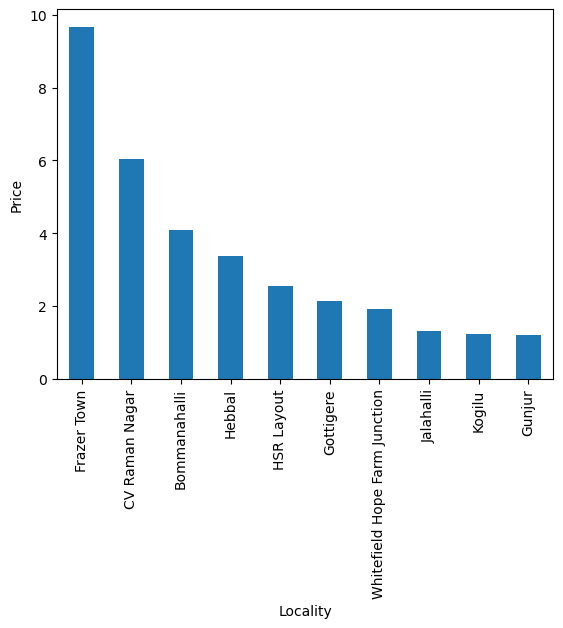

In [50]:
plt.ylabel('Price')
bng.groupby('Locality')['Price(in Crores)'].mean().nlargest(10).sort_values(ascending=False).plot(kind='bar')

### Mumbai average price by Locality highest & lowest

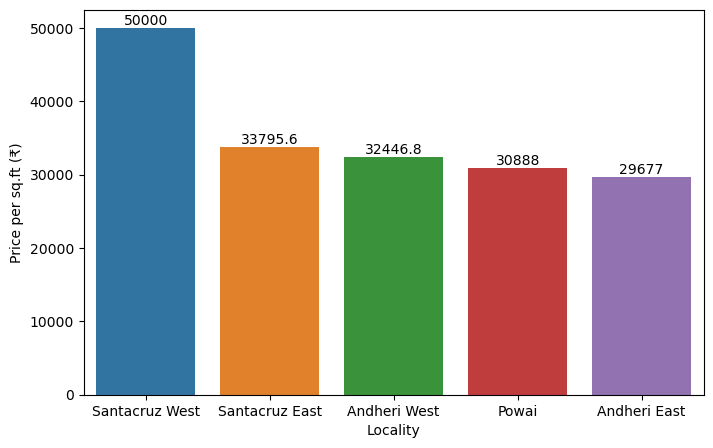

In [51]:
plt.figure(figsize=(8,5))
mum_avg=mum.groupby(['Locality'],as_index=False)['Price per sq.ft (₹)'].mean().sort_values('Price per sq.ft (₹)',ascending=False).head()
ax=sns.barplot(x='Locality',y='Price per sq.ft (₹)',data=mum_avg)
for i in ax.containers:
    ax.bar_label(i)

In [ ]:
plt.figure(figsize=(8,5))
mum_avg=mum.groupby(['Locality'],as_index=False)['Price per sq.ft (₹)'].mean().sort_values('Price per sq.ft (₹)',ascending=False).tail()
ax=sns.barplot(x='Locality',y='Price per sq.ft (₹)',data=mum_avg)
for i in ax.containers:
    ax.bar_label(i)

In [ ]:
sns.distplot(df['Price per sq.ft (₹)'])

In [ ]:
colors=sns.color_palette('mako')
plt.figure(figsize=(8,5))
sqft=df.groupby(['City'],as_index=False)['Price per sq.ft (₹)'].mean().sort_values('Price per sq.ft (₹)',ascending=False)
ax=sns.barplot(x='City',y='Price per sq.ft (₹)',data=sqft,palette=colors)
for i in ax.containers:
    ax.bar_label(i)

In [ ]:
colors=sns.color_palette('cubehelix')
plt.figure(figsize=(8,5))
sqft=df.groupby(['City'],as_index=False)['Price(in Crores)'].mean().sort_values('Price(in Crores)',ascending=False)
ax=sns.barplot(x='City',y='Price(in Crores)',data=sqft,palette=colors)
for i in ax.containers:
    ax.bar_label(i)

## Multivariate

In [ ]:
sns.pairplot(data=df)

In [ ]:
sns.scatterplot(y='Price(in Crores)',x='Price per sq.ft (₹)',data=df,hue='City')

In [ ]:
sns.scatterplot(y='Price(in Crores)',x='Area(sq.ft)',data=df,hue='City')

In [ ]:
sns.scatterplot(x=df['Area(sq.ft)'],y=df['Price per sq.ft (₹)'],hue=df['City'])

In [ ]:
sns.heatmap(df.corr(),annot=True)